## High-Frequency Trading Exploratory Data Analysis

### Import Libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Load Combined Data

In [25]:
data = pd.read_csv('../data/combined_data.csv', parse_dates=['date'])
data.set_index('date', inplace=True)

### Basic Statistics and Data Overview

In [26]:
data.describe()

,1. open,2. high,3. low,4. close,5. volume,close_normalized,close_lagged_1,close_lagged_2,close_lagged_3
count,98037.000000,98037.000000,98037.000000,98037.000000,9.803700e+04,98037.000000,98037.000000,98037.000000,98037.000000
mean,290.347520,290.453925,290.213108,290.346511,3.705812e+04,-0.000317,290.347547,290.348587,290.349629
std,132.410348,132.461346,132.353931,132.411439,3.411431e+05,0.999655,132.412055,132.412676,132.413307
min,160.916000,168.209000,154.530000,156.101000,1.000000e+00,-8.323953,156.101000,156.101000,156.101000
25%,181.100000,181.150000,181.050000,181.100000,1.210000e+02,-0.600393,181.100000,181.100000,181.100000
50%,191.630000,191.690000,191.560000,191.630000,1.594000e+03,-0.097306,191.630000,191.630000,191.630000
75%,428.375000,428.520000,428.260000,428.380000,2.841400e+04,0.639947,428.380000,428.381000,428.390000
max,516.710000,525.398000,516.250000,516.510000,4.429414e+07,4.806921,516.510000,516.510000,516.510000


### Time Series Plot of Closing Prices

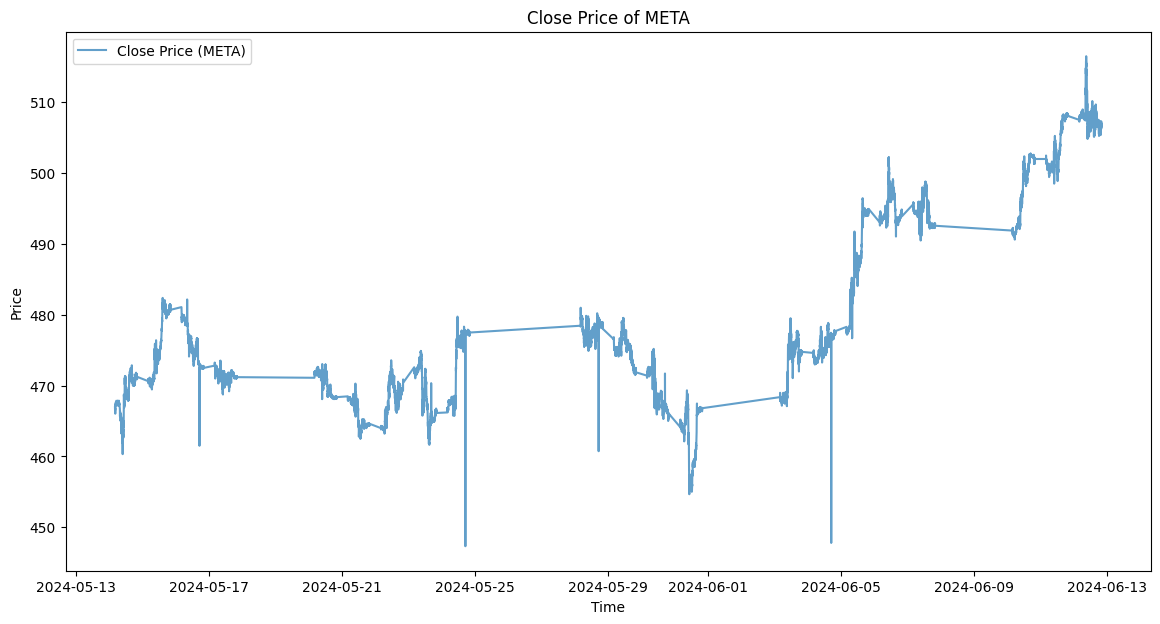

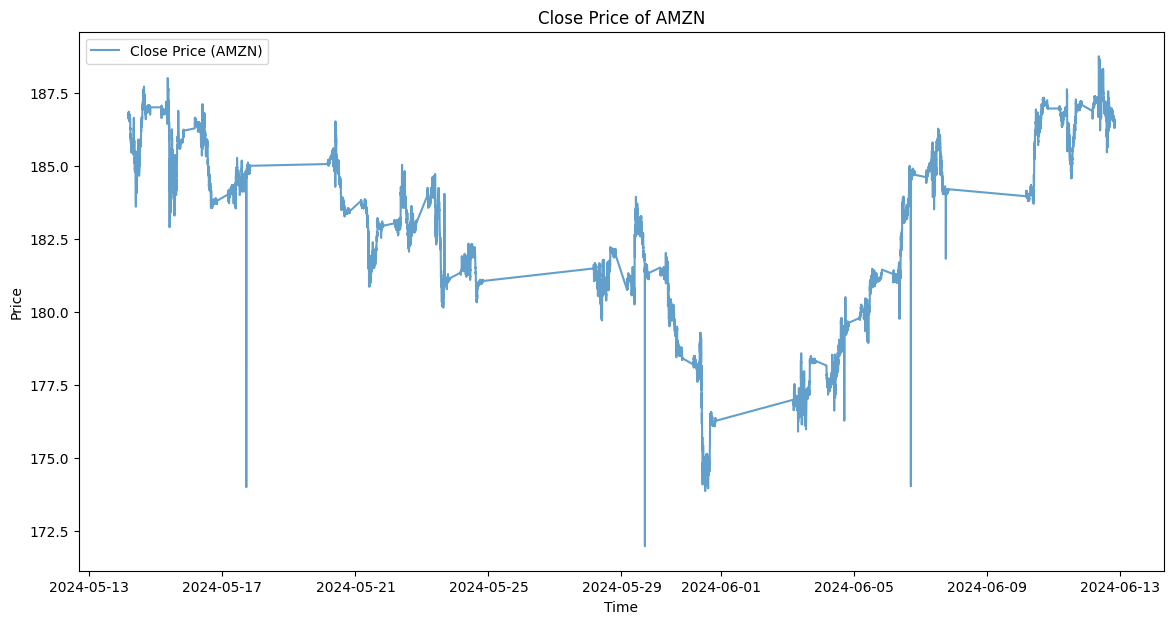

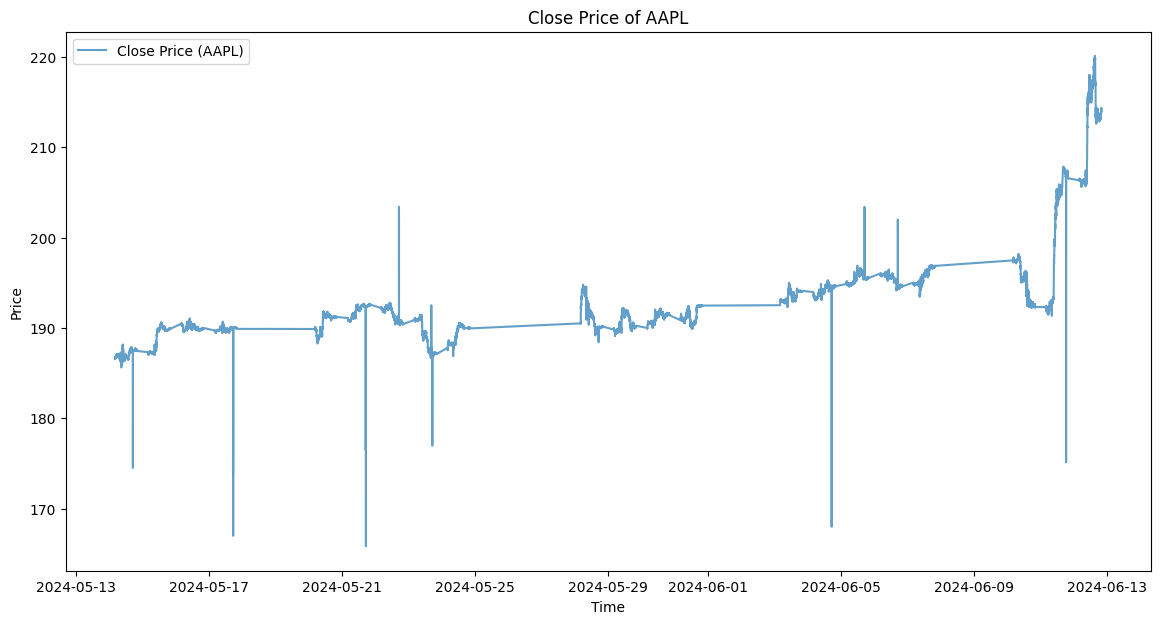

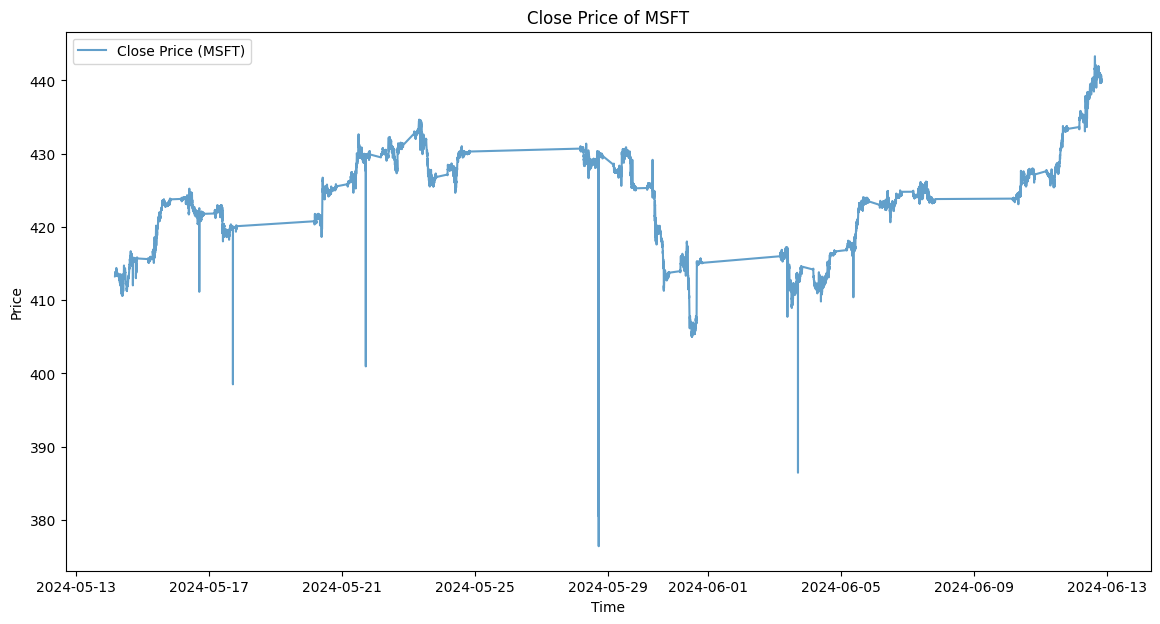

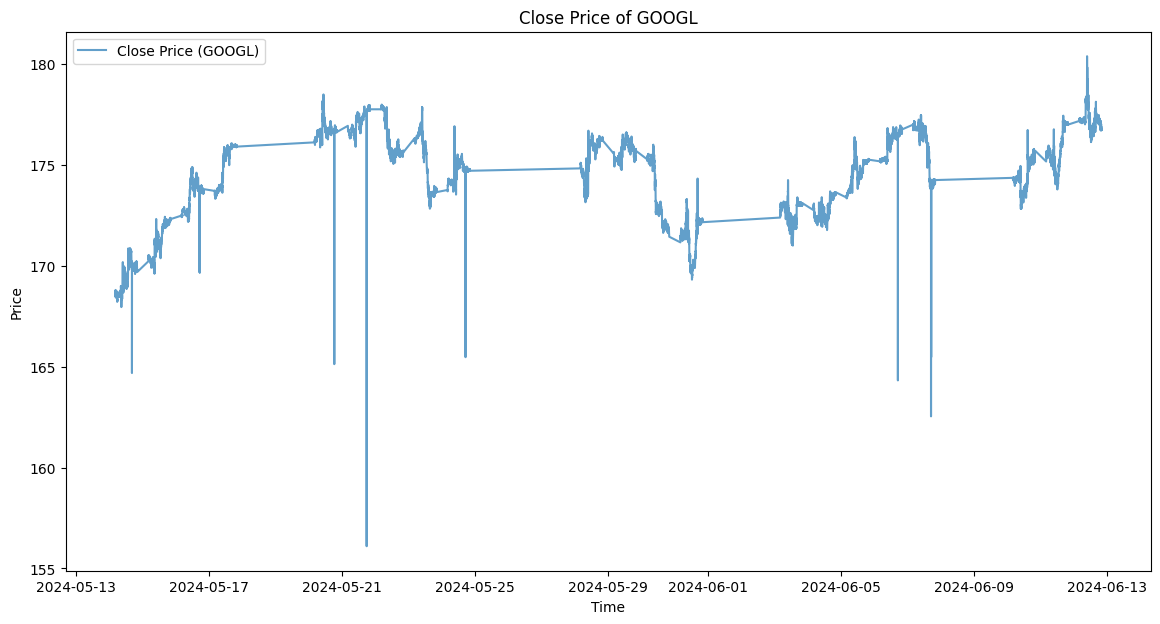

In [29]:
# Plot the raw closing prices for each symbol
for symbol in data['symbol'].unique():
    plt.figure(figsize=(14, 7))
    symbol_data = data[data['symbol'] == symbol]
    plt.plot(symbol_data.index, symbol_data['4. close'], label=f'Close Price ({symbol})', alpha=0.7)
    plt.title(f'Close Price of {symbol}')
    plt.xlabel('Time')
    plt.ylabel('Price')
    plt.legend()
    plt.show()

### Volume Analysis

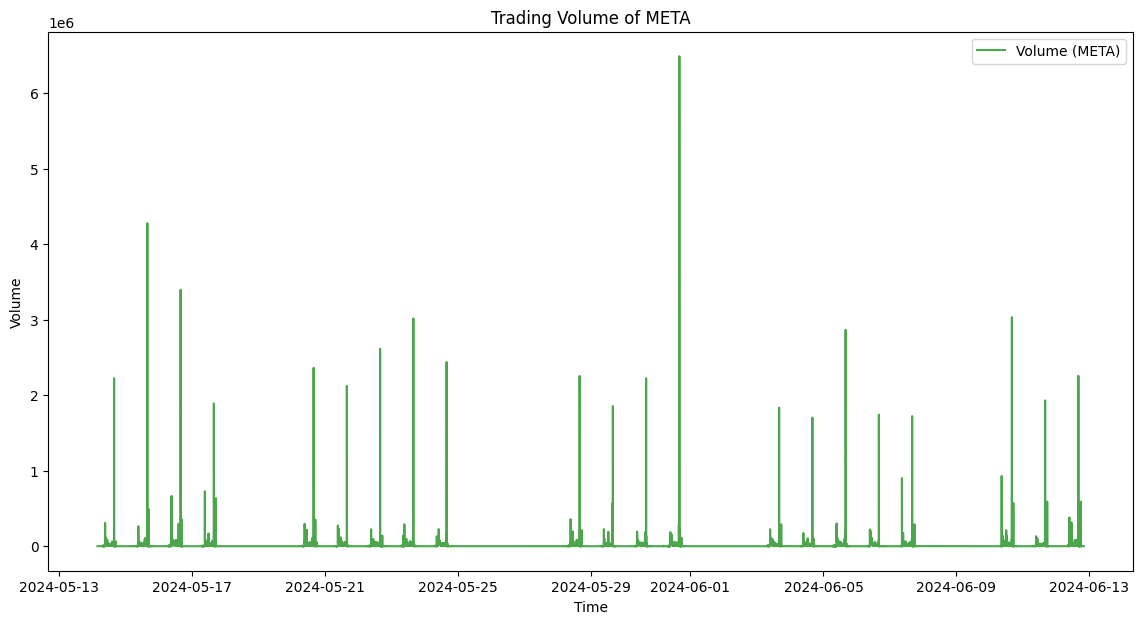

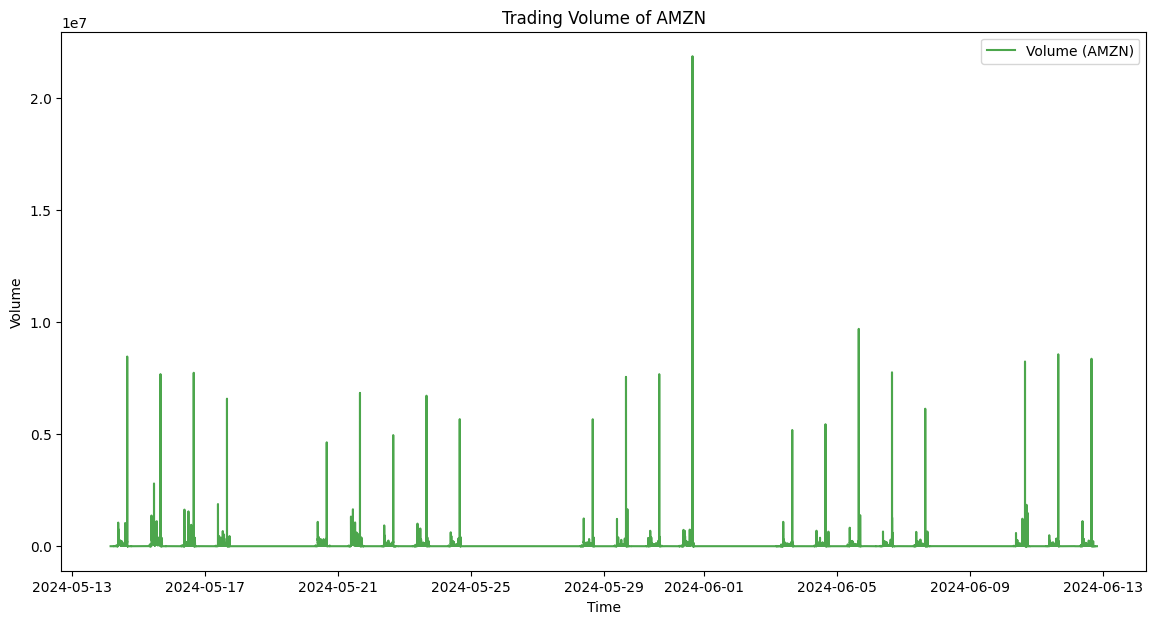

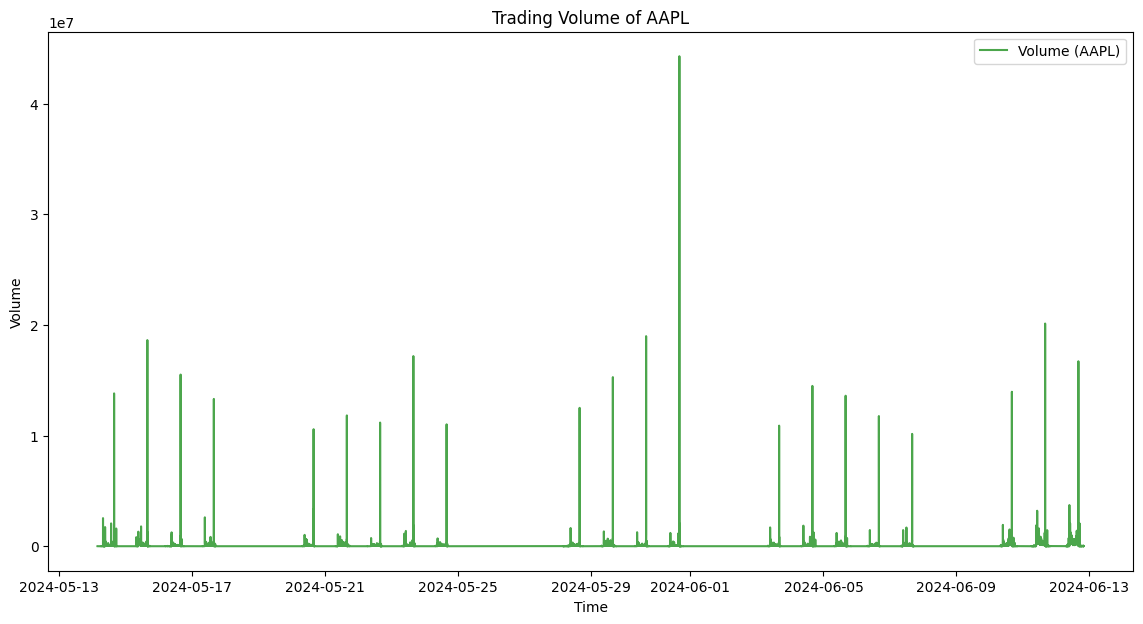

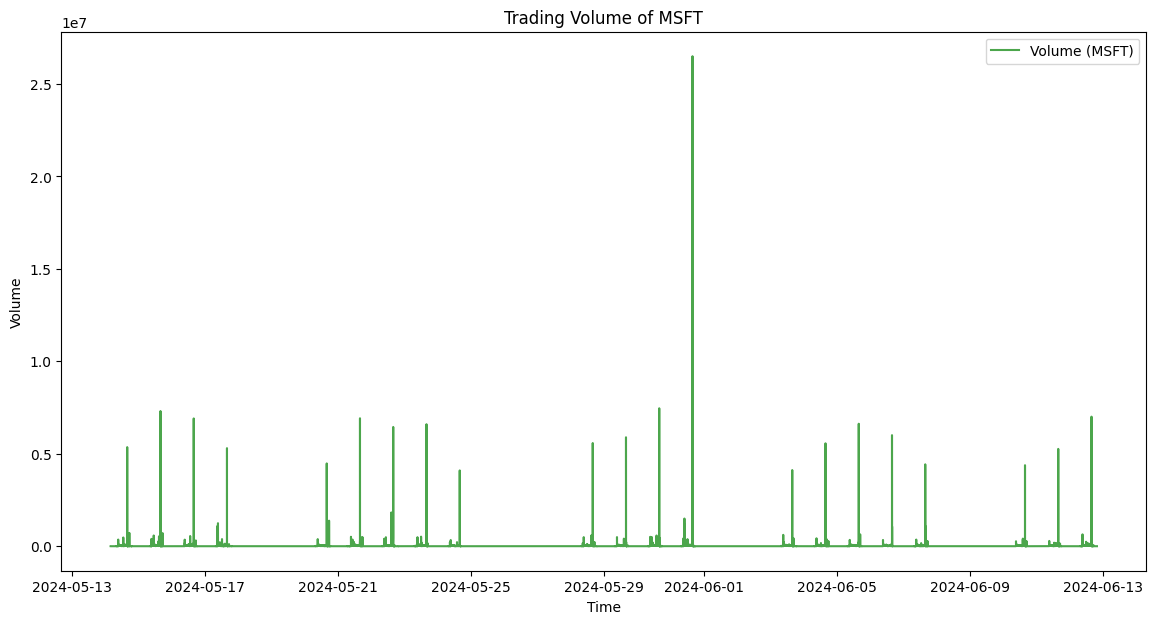

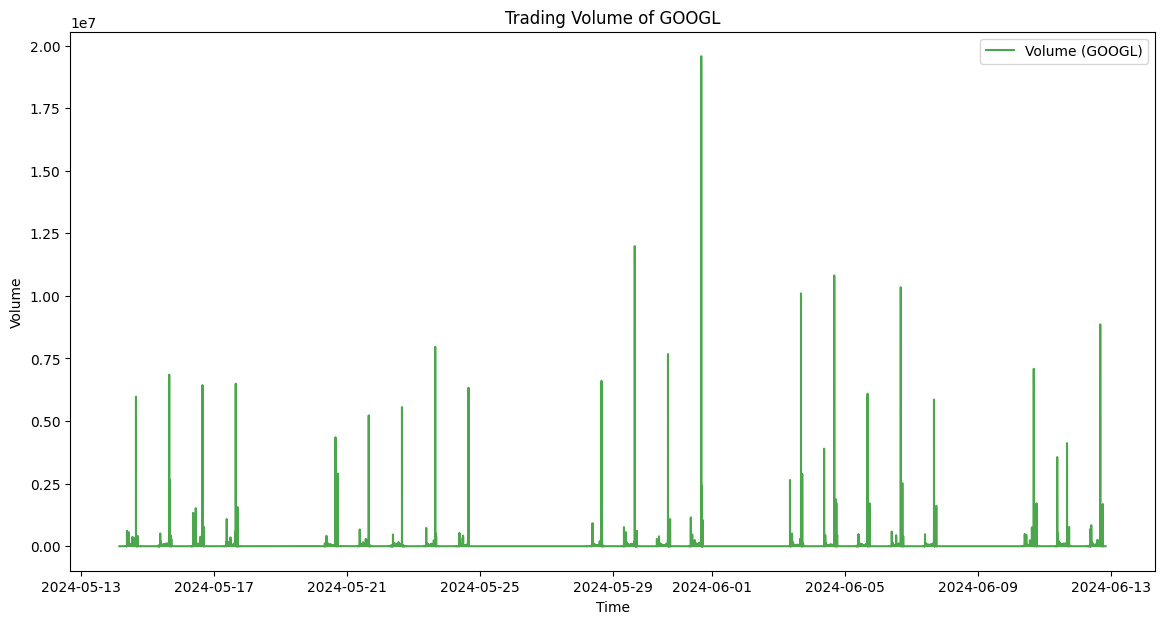

In [30]:
# Plot the trading volume for each symbol
for symbol in data['symbol'].unique():
    plt.figure(figsize=(14, 7))
    symbol_data = data[data['symbol'] == symbol]
    plt.plot(symbol_data.index, symbol_data['5. volume'], label=f'Volume ({symbol})', color='green', alpha=0.7)
    plt.title(f'Trading Volume of {symbol}')
    plt.xlabel('Time')
    plt.ylabel('Volume')
    plt.legend()
    plt.show()

### Distribution Analysis

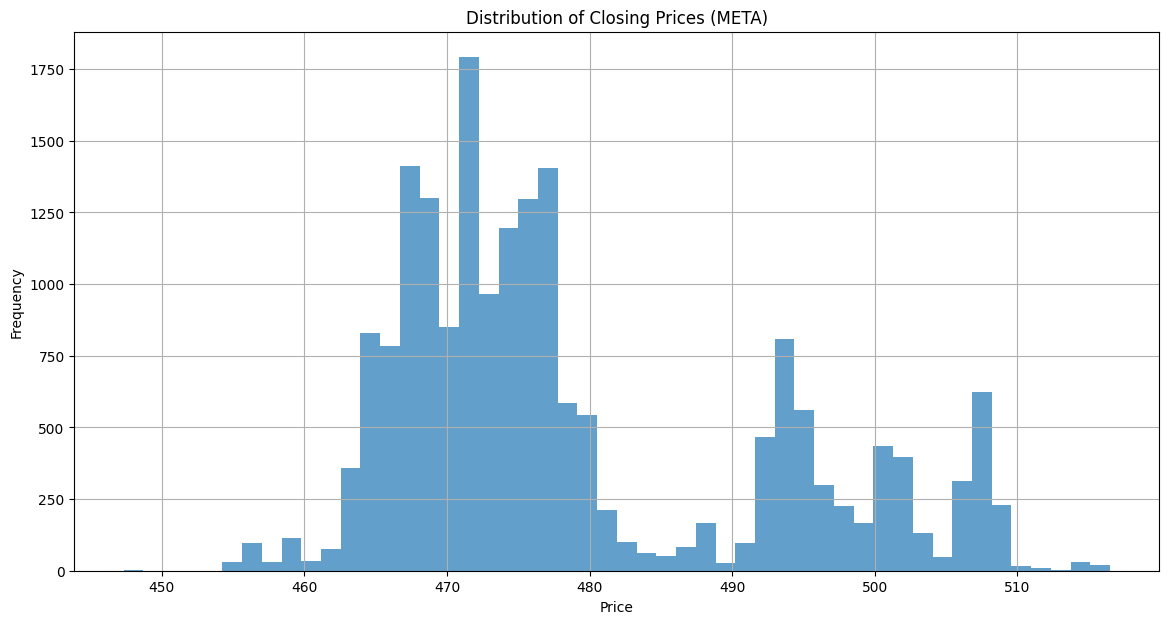

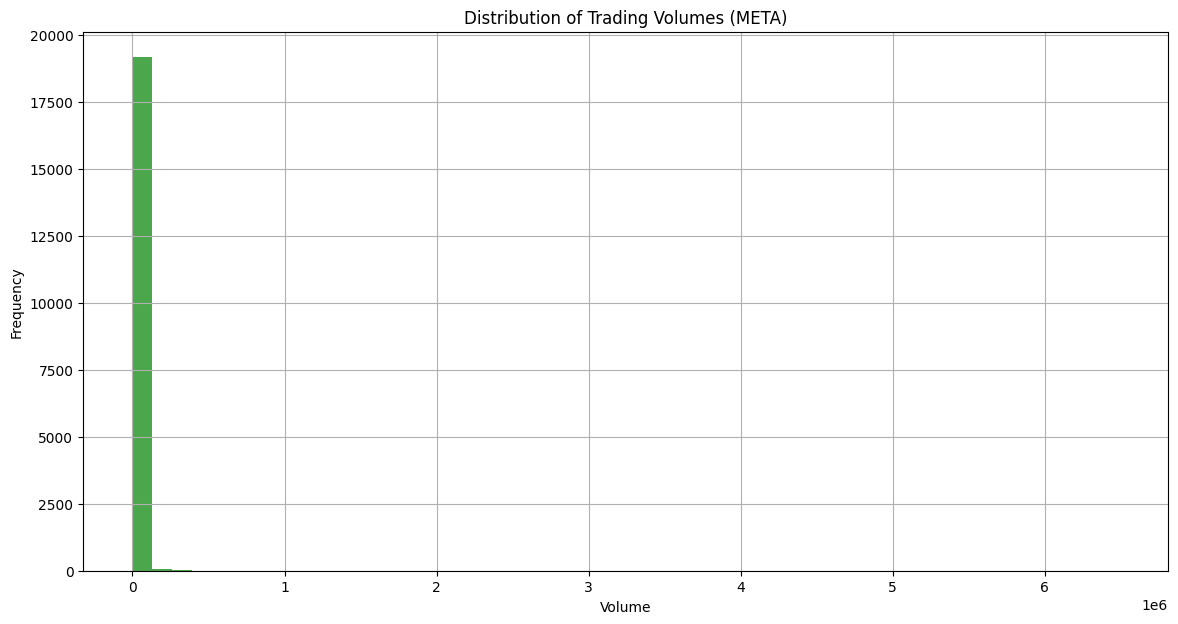

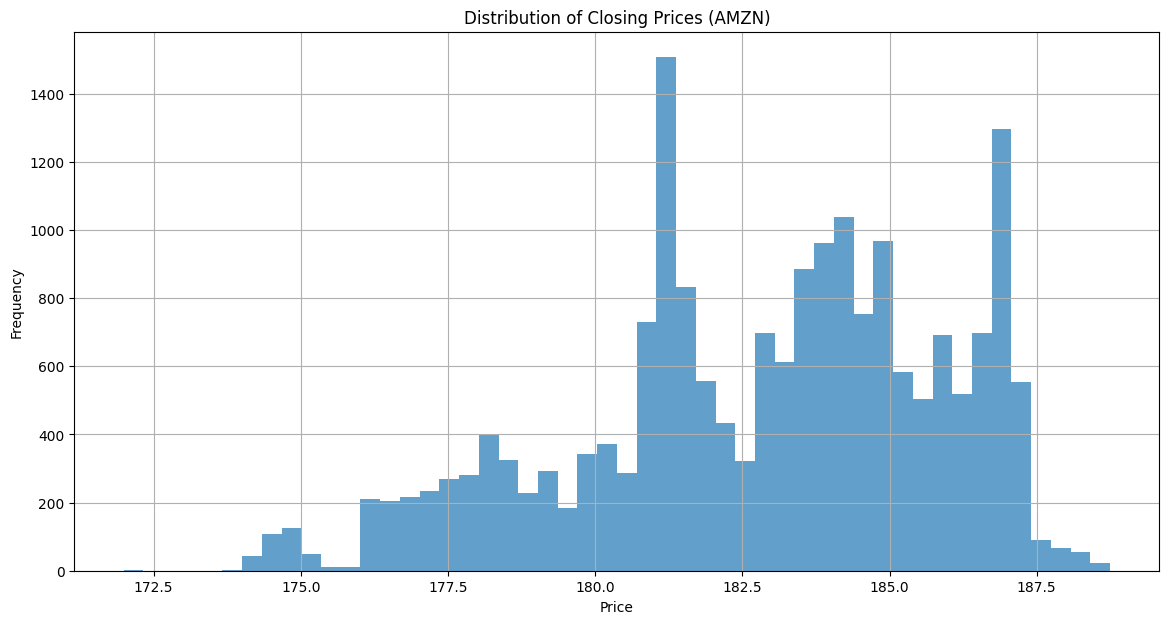

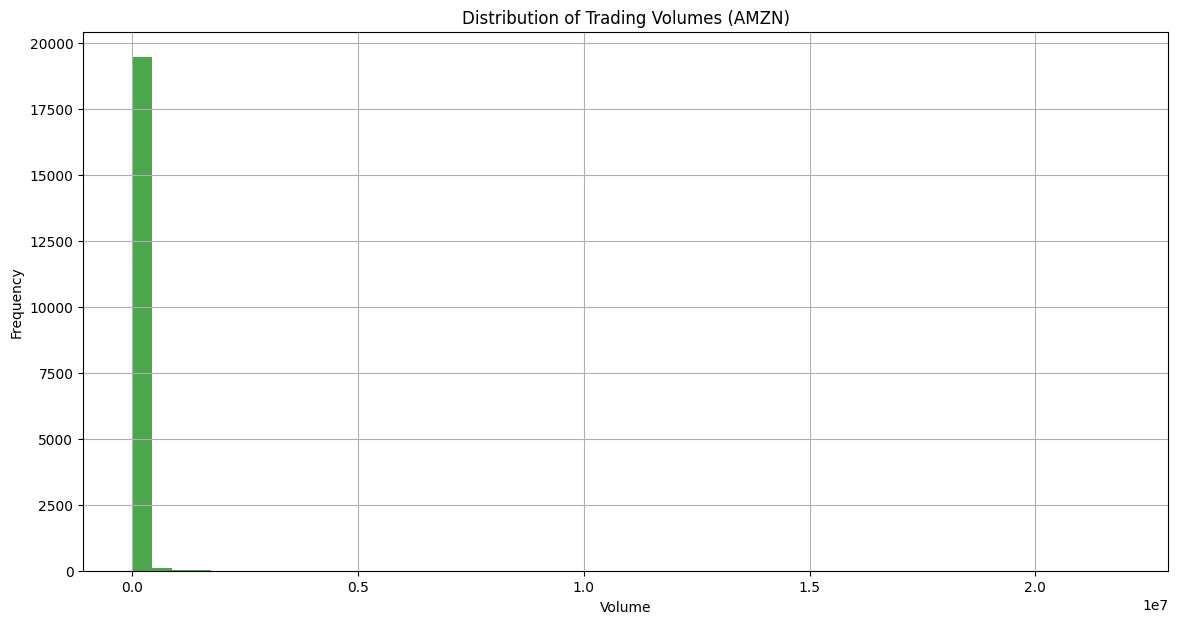

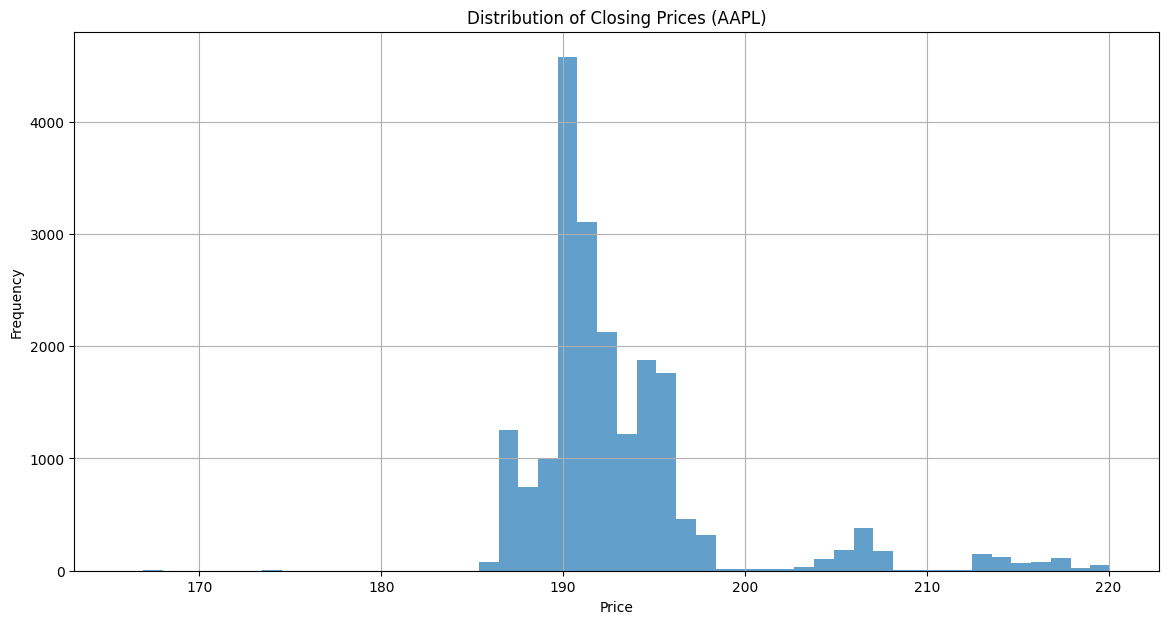

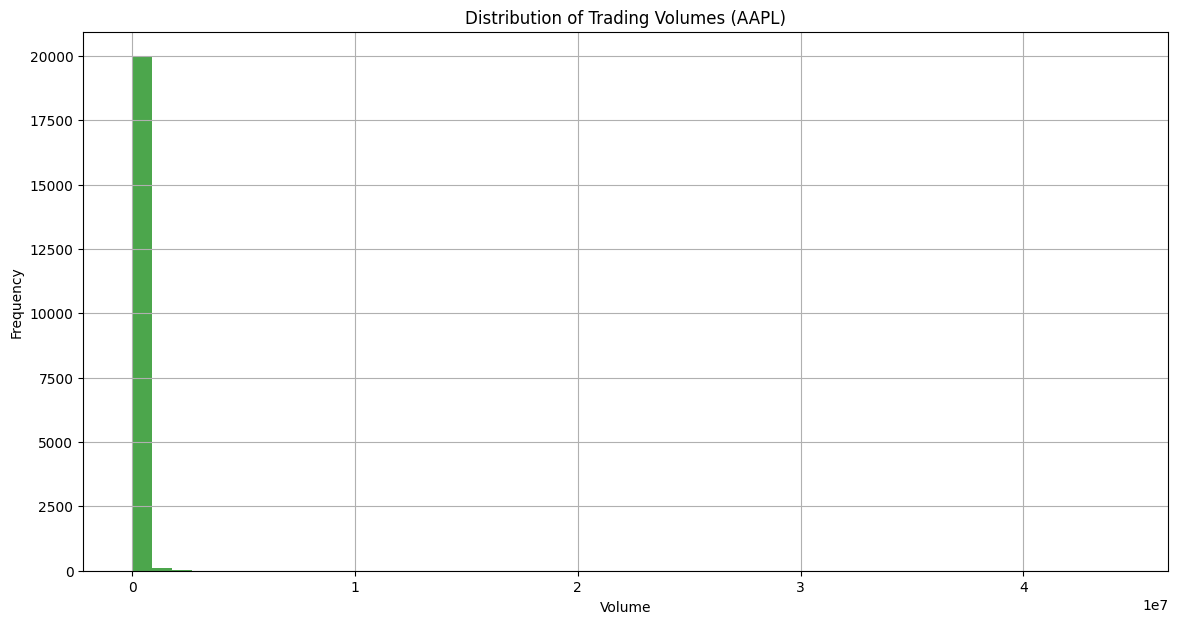

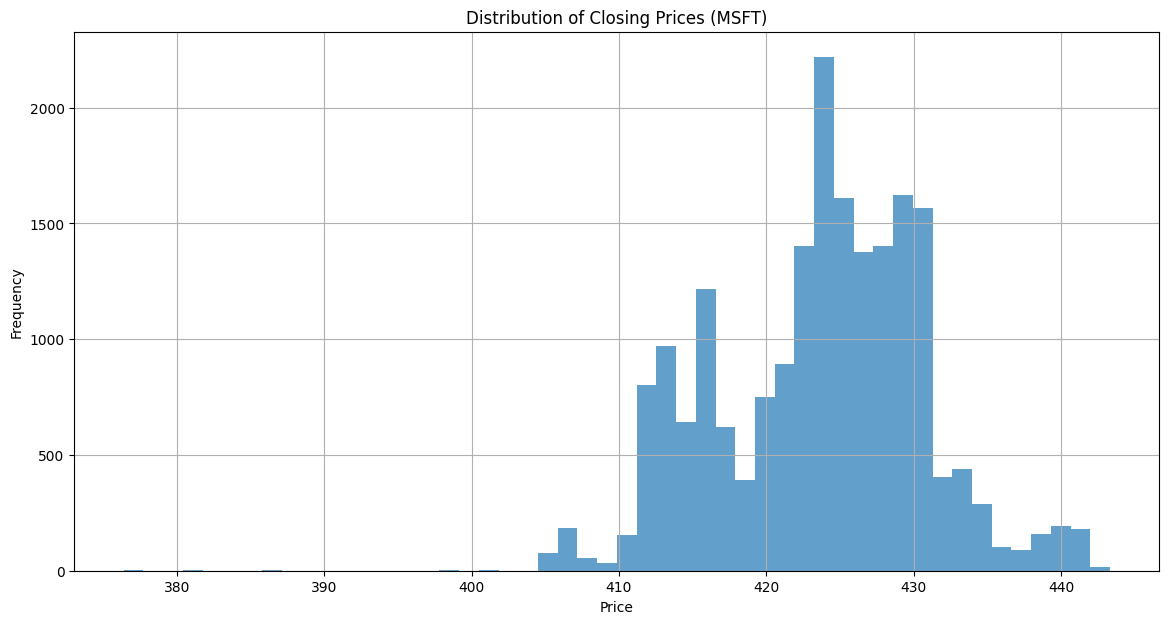

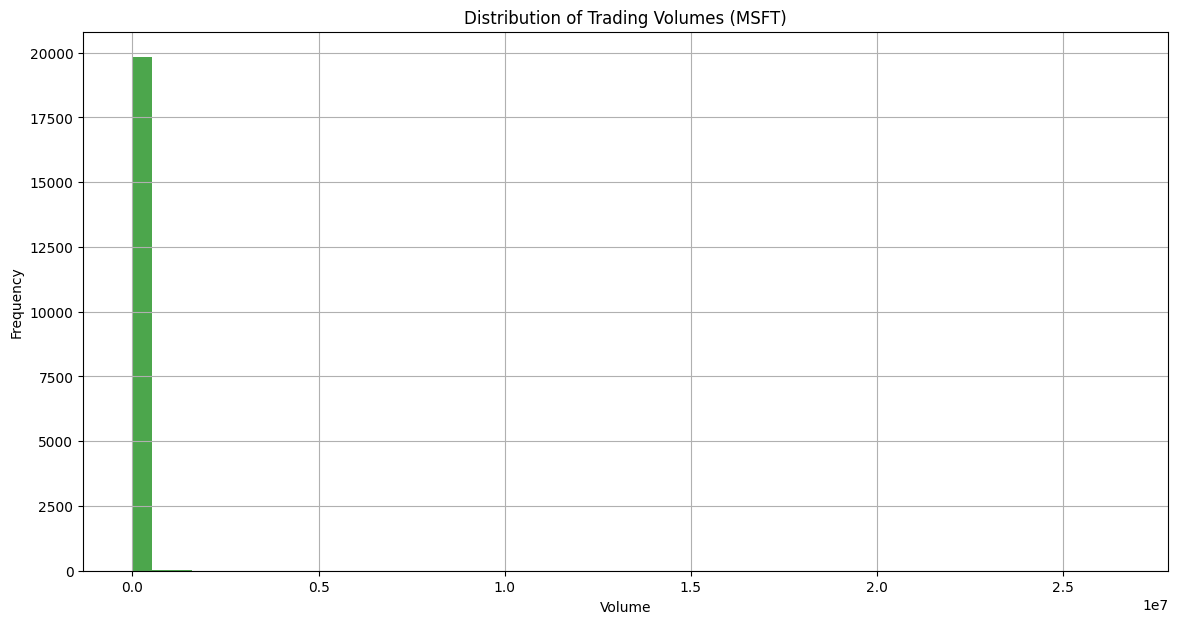

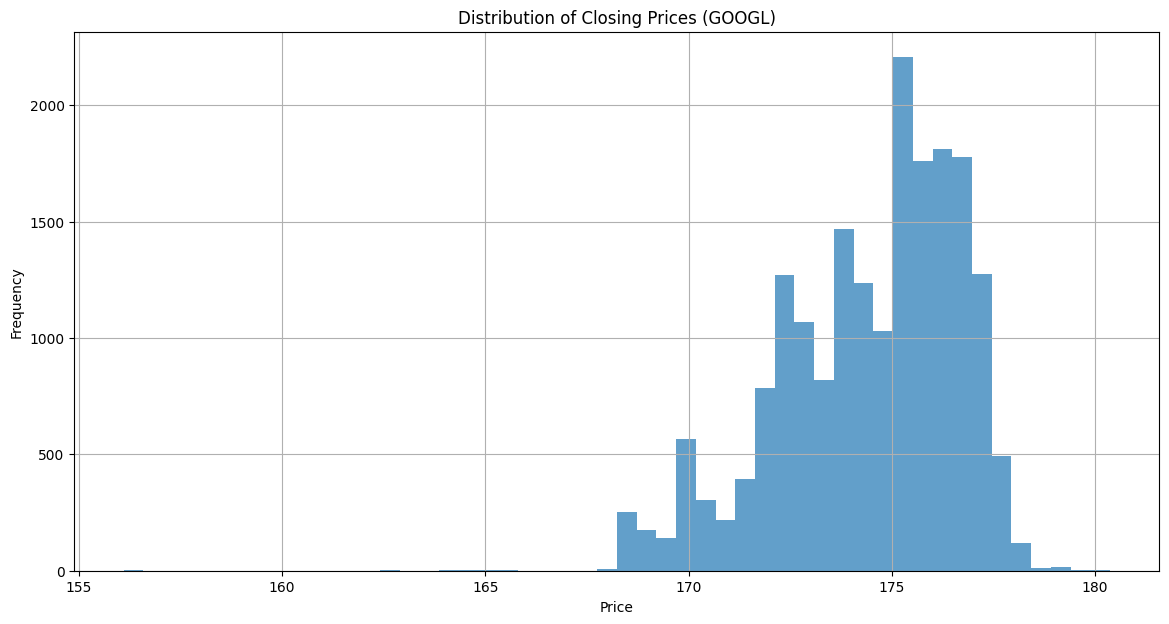

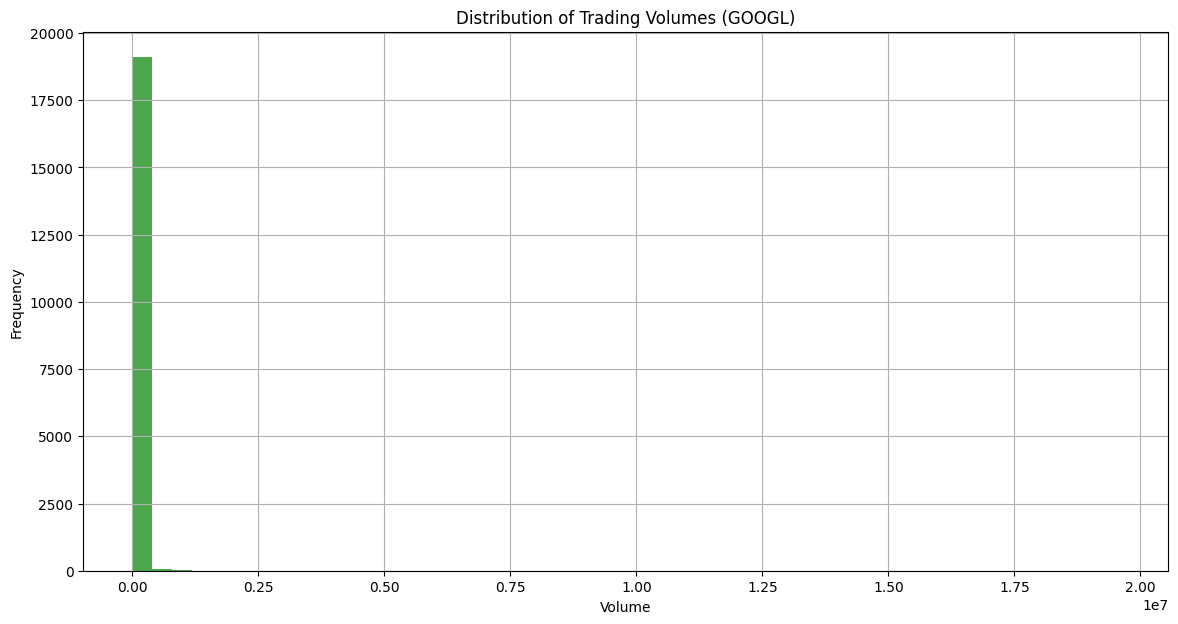

In [40]:
# Distribution of closing prices and volumes
for symbol in data['symbol'].unique():
    symbol_data = data[data['symbol'] == symbol]
    plt.figure(figsize=(14, 7))
    symbol_data['4. close'].hist(bins=50, alpha=0.7)
    plt.title(f'Distribution of Closing Prices ({symbol})')
    plt.xlabel('Price')
    plt.ylabel('Frequency')
    plt.show()

    plt.figure(figsize=(14, 7))
    symbol_data['5. volume'].hist(bins=50, color='green', alpha=0.7)
    plt.title(f'Distribution of Trading Volumes ({symbol})')
    plt.xlabel('Volume')
    plt.ylabel('Frequency')
    plt.show()

### Correlation Analysis

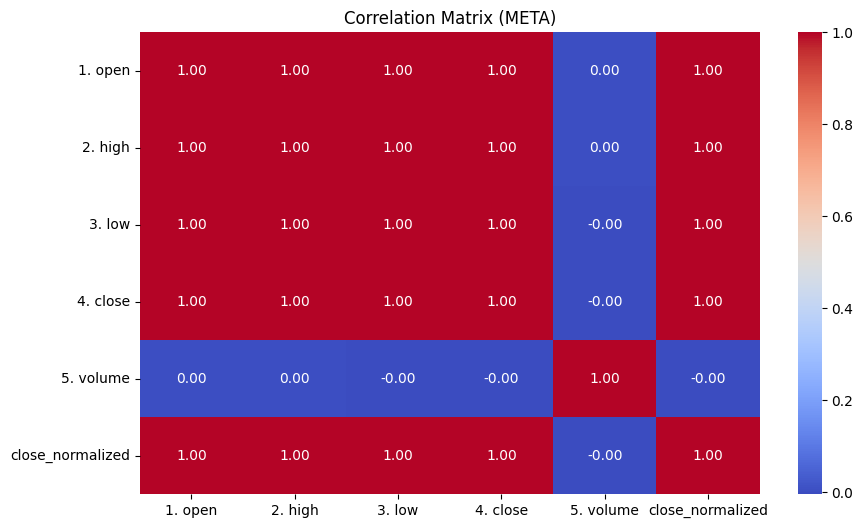

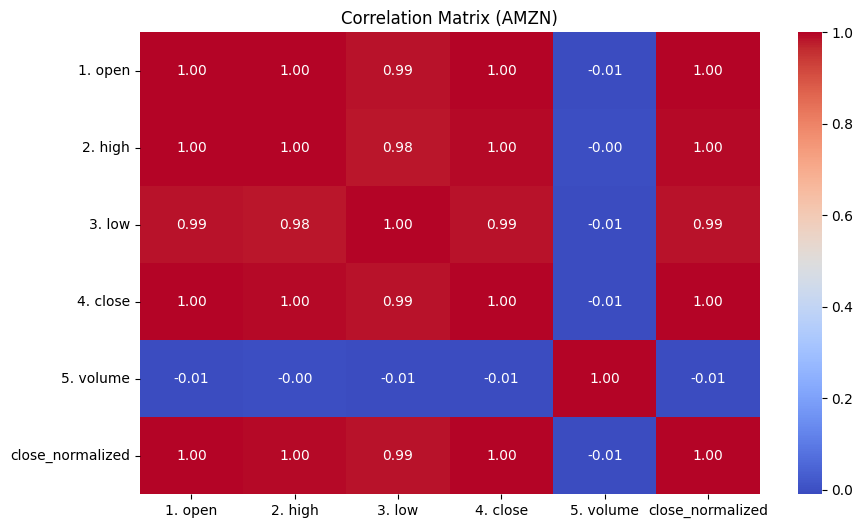

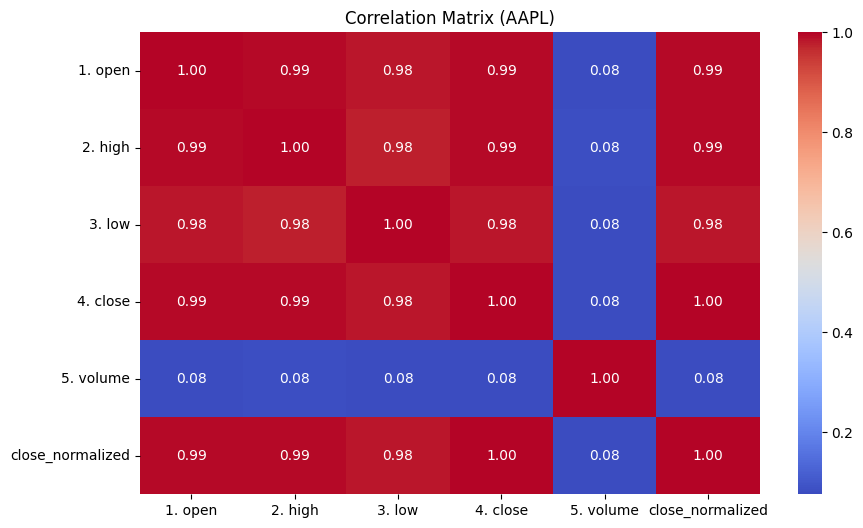

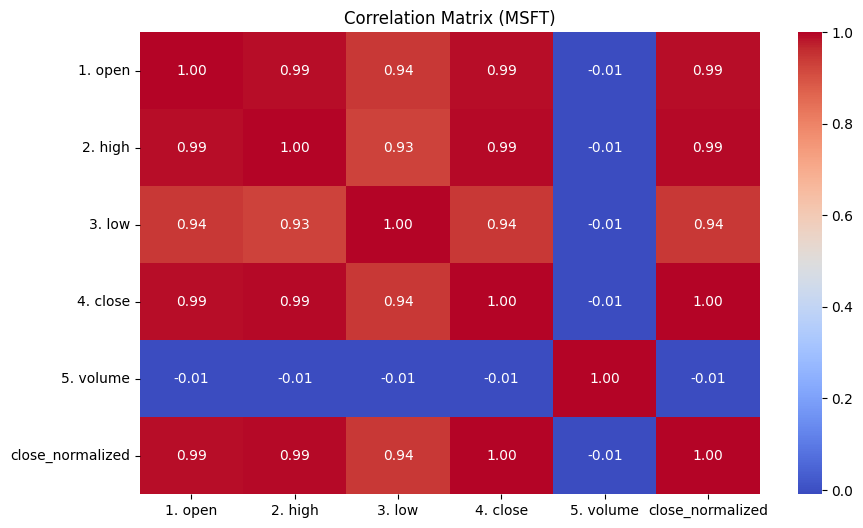

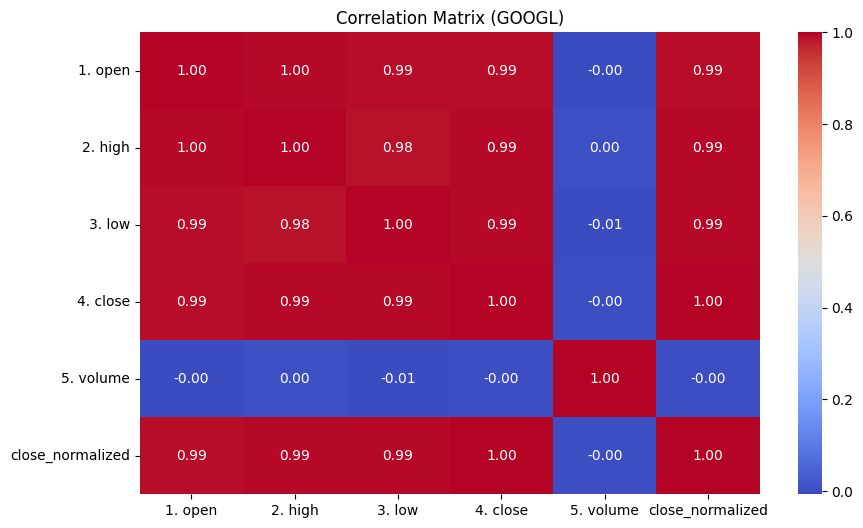

In [41]:
# Correlation matrix for each symbol
for symbol in data['symbol'].unique():
    symbol_data = data[data['symbol'] == symbol]
    correlation_matrix = symbol_data[['1. open', '2. high', '3. low', '4. close', '5. volume', 'close_normalized']].corr()
    plt.figure(figsize=(10, 6))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title(f'Correlation Matrix ({symbol})')
    plt.show()